# Librerias

In [3]:
import os
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import pandas as pd

# Shapefile de estaciones climatologicas

In [4]:
path_Estaciones = r"D:\UAT_Doc\Climatologia_Tomates_Tamos\Estaciones.shp"

# Rasters de PCP

In [5]:
path1960to1969 = r"D:\UAT_Doc\Sobre_proyecto_de_investigacion\worldclim\1960-1969"

In [6]:
path1960to1969 = r"D:\UAT_Doc\Sobre_proyecto_de_investigacion\worldclim\1960-1969"

In [7]:
list1960to1969 = [os.path.join (path1960to1969, band) for band in os.listdir(path1960to1969) if band.endswith('tif')]
print(list1960to1969)

['D:\\UAT_Doc\\Sobre_proyecto_de_investigacion\\worldclim\\1960-1969\\wc2.1_2.5m_prec_1960-01.tif', 'D:\\UAT_Doc\\Sobre_proyecto_de_investigacion\\worldclim\\1960-1969\\wc2.1_2.5m_prec_1960-02.tif', 'D:\\UAT_Doc\\Sobre_proyecto_de_investigacion\\worldclim\\1960-1969\\wc2.1_2.5m_prec_1960-03.tif', 'D:\\UAT_Doc\\Sobre_proyecto_de_investigacion\\worldclim\\1960-1969\\wc2.1_2.5m_prec_1960-04.tif', 'D:\\UAT_Doc\\Sobre_proyecto_de_investigacion\\worldclim\\1960-1969\\wc2.1_2.5m_prec_1960-05.tif', 'D:\\UAT_Doc\\Sobre_proyecto_de_investigacion\\worldclim\\1960-1969\\wc2.1_2.5m_prec_1960-06.tif', 'D:\\UAT_Doc\\Sobre_proyecto_de_investigacion\\worldclim\\1960-1969\\wc2.1_2.5m_prec_1960-07.tif', 'D:\\UAT_Doc\\Sobre_proyecto_de_investigacion\\worldclim\\1960-1969\\wc2.1_2.5m_prec_1960-08.tif', 'D:\\UAT_Doc\\Sobre_proyecto_de_investigacion\\worldclim\\1960-1969\\wc2.1_2.5m_prec_1960-09.tif', 'D:\\UAT_Doc\\Sobre_proyecto_de_investigacion\\worldclim\\1960-1969\\wc2.1_2.5m_prec_1960-10.tif', 'D:\\UAT_

In [8]:
for raster_path in list1960to1969:
    if not os.path.exists(raster_path):
        print(f'el archivo {raster_path} no existe.')
        raise FileNotFoundError (f'El archivo {raster_path} no existe.')

In [9]:
Estaciones = gpd.read_file(path_Estaciones)
Estaciones

,Estacion,Nom_Est,Mun,Estado,Situacion,Lat,Long,geometry
0,30166,Tamos,Panuco,Veracruz,Operando,22.216111,-97.998611,POINT (-97.99861 22.21611)
1,28055,Los Tomates,Altamira,Tamaulipas,Operando,22.452778,-98.197222,POINT (-98.19722 22.45278)


<AxesSubplot:>

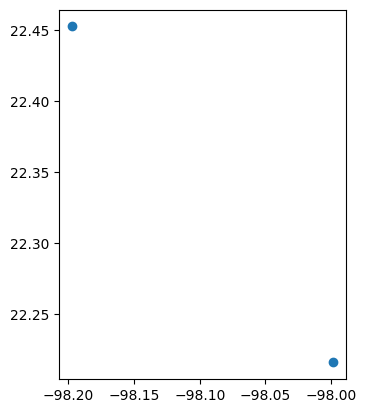

In [10]:
Estaciones.plot()

In [11]:
df = Estaciones.copy()

# Extraccion de valores

In [12]:
for raster_path in list1960to1969:
    with rasterio.open(raster_path) as raster:
        raster_name2 = os.path.splitext(os.path.basename(raster_path))[0]
        raster_name = raster_name2.split('_')[-1]
        coordenadas = [(geom.x, geom.y) for geom in Estaciones.geometry]
        PCP = [PCP[0] for PCP in raster.sample(coordenadas)]
        df[raster_name] = PCP
                                       

C:\Users\Edgar Ruiz\.conda\envs\Cartografia\lib\site-packages\geopandas\geodataframe.py:1351: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


In [13]:
df.head()

,Estacion,Nom_Est,Mun,Estado,Situacion,Lat,Long,geometry,1960-01,1960-02,...,1969-03,1969-04,1969-05,1969-06,1969-07,1969-08,1969-09,1969-10,1969-11,1969-12
0,30166,Tamos,Panuco,Veracruz,Operando,22.216111,-97.998611,POINT (-97.99861 22.21611),11.4,7.4,...,8.8,21.100000,42.700001,79.500000,155.399994,264.799988,329.100006,119.599998,24.4,22.299999
1,28055,Los Tomates,Altamira,Tamaulipas,Operando,22.452778,-98.197222,POINT (-98.19722 22.45278),8.1,5.8,...,9.7,19.299999,38.400002,97.300003,138.199997,292.000000,284.100006,87.800003,24.0,13.800000


# Exportar a Excel

In [18]:
path1960to1969xls = r"D:\UAT_Doc\Sobre_proyecto_de_investigacion\worldclim\PCP_1960_1969.xlsx"

In [19]:
df.to_excel(path1960to1969xls, index = False)
print(f'los valores han sido extraidos y enviados a {path1960to1969xls}')

los valores han sido extraidos y enviados a D:\UAT_Doc\Sobre_proyecto_de_investigacion\worldclim\PCP_1960_1969.xlsx
